In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [49]:
local_results_dir = "/home/s2208943/ipdis/WMH_UQ_assessment/trustworthai/journal_run/evaluation/results/per_method_tuning"

In [151]:
folders = os.listdir(local_results_dir)

In [152]:
model_names = [(f.split("_individual_stats.csv")[0], folder) for folder in folders for f in os.listdir(os.path.join(local_results_dir, folder)) if "_individual_stats.csv" in f]
model_folder = [mn[1] for mn in model_names]
model_names = [mn[0] for mn in model_names]

In [153]:
model_names

['mcdrop_encoderboth_0.05',
 'mcdrop_encoder1_0.05',
 'mcdrop_all_0.4',
 'ssn_prehead32_rank10_sdice0',
 'ssn_prehead32_rank12_sdice0',
 'ssn_prehead32_rank15_sdice0.05',
 'mcdrop_encoder1_0.3',
 'ssn_prehead32_rank15_sdice0.1',
 'ssn_prehead64_rank50_sdice0',
 'mcdrop_encoder1_0.4',
 'mcdrop_all_0.3',
 'mcdrop_encoder1_0.2',
 'ssn_prehead16_rank15_sdice0',
 'ssn_prehead32_rank25_sdice0',
 'mcdrop_encoderboth_0.2',
 'mcdrop_encoderboth_0.4',
 'ssn_prehead32_rank15_sdice1',
 'mcdrop_all_0.1',
 'ssn_prehead32_rank5_sdice0',
 'mcdrop_encoderboth_0.3',
 'evid_combo_kl1',
 'evid_dice',
 'evid_combo_kl0.05',
 'evid_mlecombo_kl0.5',
 'evid_mlecombo_kl0.05',
 'evid_combo_kl0',
 'evid_combo_kl0.1',
 'evid_mle',
 'evid_mlecombo_kl0.1',
 'evid_combo_k0.1_anneal_short',
 'evid_combo_k0.1_anneal_long',
 'evid_combo_kl0.01',
 'evid_combo_kl0.5',
 'evid_xent',
 'punet_kl1_sdice0_l6_al1',
 'punet_kl1_sdice0_l36_al1',
 'punet_kl0.1_sdice0_l12_al1',
 'punet_kl0.5_sdice0_l12_al1',
 'punet_kl1_sdice0_l12_

In [85]:
model_file = os.path.join(local_results_dir, model_folder[0], model_names[0])
example = pd.read_csv(model_file + "_overall_stats.csv")

In [76]:
ssn_rank = [
 'ssn_prehead32_rank5_sdice0',
 'ssn_prehead32_rank10_sdice0',
 'ssn_prehead32_rank12_sdice0',
 'ssn_prehead32_rank15_sdice0',
 'ssn_prehead32_rank18_sdice0',
 'ssn_prehead32_rank20_sdice0',
 'ssn_prehead32_rank25_sdice0',
 'ssn_prehead32_rank30_sdice0',
 'ssn_prehead64_rank40_sdice0',
 'ssn_prehead64_rank50_sdice0',
]

ssn_sdice = [
 'ssn_prehead32_rank15_sdice0',
 'ssn_prehead32_rank15_sdice0.05',
 'ssn_prehead32_rank15_sdice0.1',
 'ssn_prehead32_rank15_sdice0.5',
 'ssn_prehead32_rank15_sdice1',
]

ssn_prehead = [
 'ssn_prehead16_rank15_sdice0',
 'ssn_prehead32_rank15_sdice0',
]


In [90]:
#load the files
def load_dfs(folder, model_names, model_folder):
    dfs_individual = []
    dfs_overall = []
    
    combine_dfs = lambda dfs: pd.concat(dfs).drop(columns=["Unnamed: 0"]).reset_index(drop=True)
    
    for i, model_name in enumerate(model_names):
        model_file = os.path.join(folder, model_folder, model_name)
        try:
            dfs_individual.append(pd.read_csv(model_file + "_individual_stats.csv"))
            dfs_overall.append(pd.read_csv(model_file + "_overall_stats.csv"))
        except:
            print(f"{model_name} failed")
    
    return combine_dfs(dfs_individual), combine_dfs(dfs_overall)




In [100]:
def plot_box_colums(df):

    ncols = len(df.columns) - 1
    fig, axs = plt.subplots(1, ncols, figsize=(30, 5))

    for i, col in enumerate(df.columns[:-1]):
        ax = axs[i] 
        bp = sns.boxplot(x="model_name", y=col, data=df, ax=ax)
        ax.set_title(col)
        ax.xaxis.set_ticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_ylabel('')

    # plt.setp(axs, xticklabels=df["model_name"].unique())
    # plt.tick_params(axis='x', which='major', labelsize=15, labelrotation=90)
    plt.tight_layout()
    plt.show()

In [131]:
pd.set_option('display.float_format',
      lambda x: '{:,.3f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))

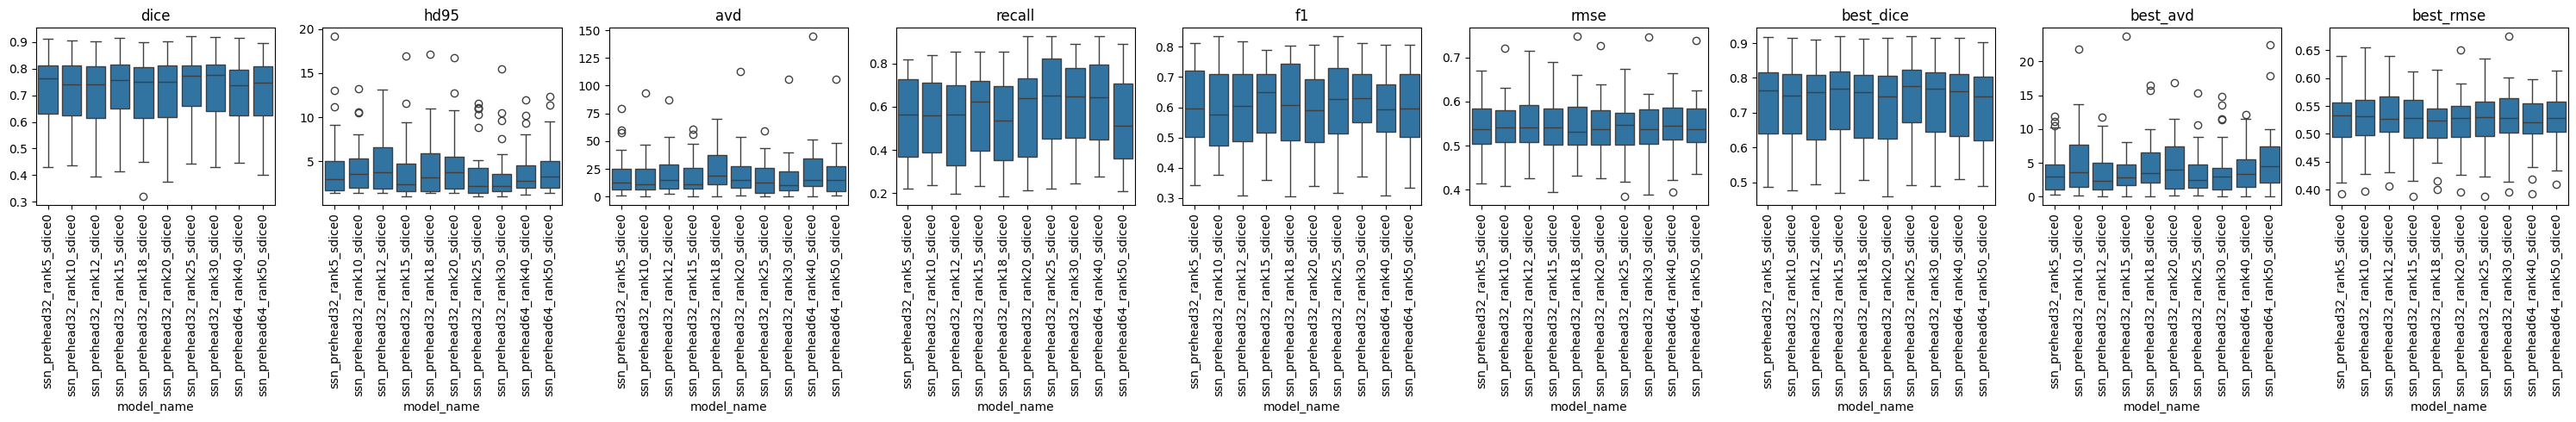

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,ssn_prehead32_rank5_sdice0,0.728,0.739,18.144,3.649,4.196,0.540,0.525,0.556,0.598
1,ssn_prehead32_rank10_sdice0,0.718,0.731,17.882,4.994,4.091,0.541,0.528,0.552,0.584
2,ssn_prehead32_rank12_sdice0,0.712,0.727,20.745,3.599,4.616,0.548,0.531,0.524,0.589
3,ssn_prehead32_rank15_sdice0,0.734,0.746,16.568,3.781,3.862,0.537,0.522,0.576,0.610
4,ssn_prehead32_rank18_sdice0,0.707,0.734,25.089,4.601,4.325,0.546,0.520,0.532,0.595
5,ssn_prehead32_rank20_sdice0,0.712,0.726,21.069,4.596,4.525,0.543,0.524,0.557,0.588
6,ssn_prehead32_rank25_sdice0,0.739,0.750,16.832,3.358,3.747,0.538,0.526,0.624,0.614
7,ssn_prehead32_rank30_sdice0,0.735,0.744,17.857,3.918,3.407,0.539,0.530,0.605,0.625
8,ssn_prehead64_rank40_sdice0,0.717,0.735,24.005,4.136,3.717,0.542,0.522,0.621,0.588
9,ssn_prehead64_rank50_sdice0,0.713,0.727,19.715,5.344,4.248,0.546,0.528,0.535,0.585


In [135]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, ssn_rank, "ssn_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

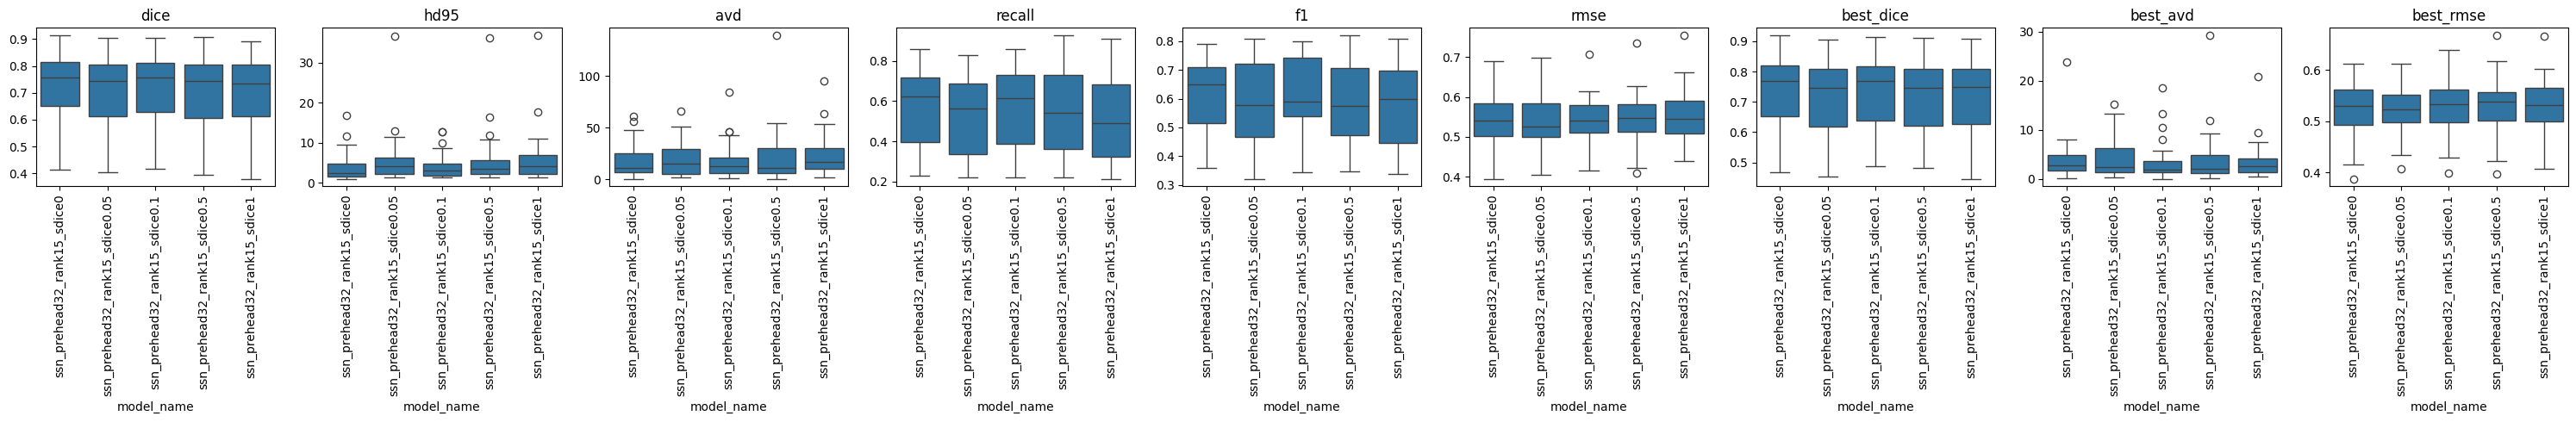

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,ssn_prehead32_rank15_sdice0,0.734,0.746,16.568,3.781,3.862,0.537,0.522,0.576,0.610
1,ssn_prehead32_rank15_sdice0.05,0.710,0.720,19.563,4.289,5.638,0.540,0.522,0.523,0.579
2,ssn_prehead32_rank15_sdice0.1,0.725,0.739,18.563,3.326,4.035,0.541,0.528,0.570,0.605
3,ssn_prehead32_rank15_sdice0.5,0.709,0.726,20.965,3.918,5.323,0.545,0.529,0.557,0.583
4,ssn_prehead32_rank15_sdice1,0.701,0.721,23.364,3.572,5.684,0.553,0.531,0.535,0.573


In [136]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, ssn_sdice, "ssn_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

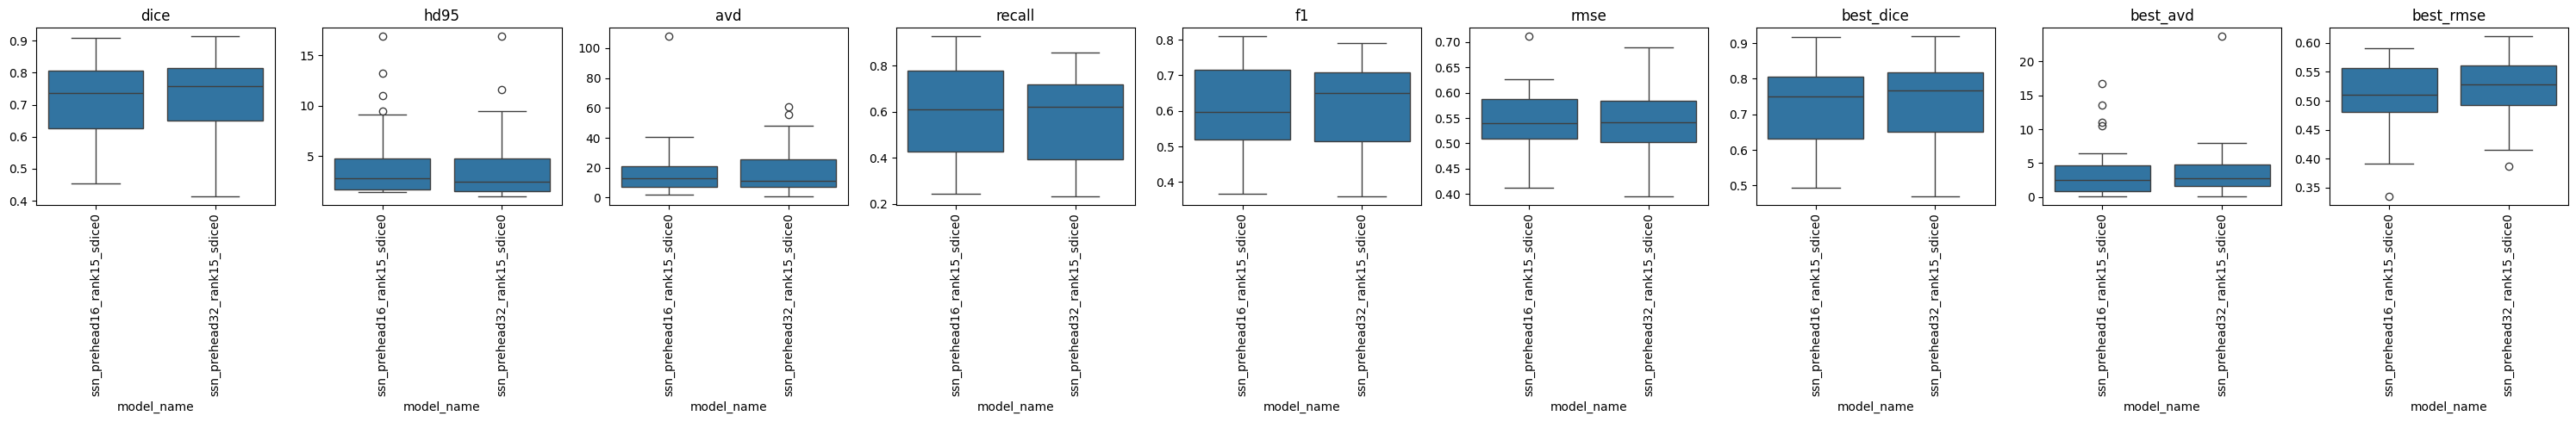

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,ssn_prehead16_rank15_sdice0,0.725,0.734,17.739,3.671,4.152,0.544,0.509,0.610,0.609
1,ssn_prehead32_rank15_sdice0,0.734,0.746,16.568,3.781,3.862,0.537,0.522,0.576,0.610


In [137]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, ssn_prehead, "ssn_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

In [157]:
punet_wd = [
 'punet_kl1_sdice0_l12_al1',
 'punet_kl1_sdice0_l12_al1_wd0',
 'punet_kl10_sdice0_l12_al1_wd0',
]

punet_al = [
 'punet_kl1_sdice0_l12_al1',
 'punet_kl1_sdice0_l12_al0',
 'punet_kl1_sdice1_l12_al0',
]

punet_ls = [
 'punet_kl1_sdice0_l6_al1',
 'punet_kl1_sdice0_l12_al1',
 'punet_kl1_sdice0_l24_al1',
 'punet_kl1_sdice0_l36_al1',

]

punet_kl = [
 'punet_kl0.1_sdice0_l12_al1',
 'punet_kl0.5_sdice0_l12_al1',
 'punet_kl5_sdice0_l12_al1',
 'punet_kl1_sdice0_l12_al1',
 'punet_kl10_sdice0_l12_al1_wd0',
]

punet_onpost = [
 'punet_kl1_sdice0_l12_al1',
 'punet_kl1_sdice0_l12_al1_onpost',
]

punet_sdice = [
 'punet_kl1_sdice0_l12_al1',
 'punet_kl1_sdice0.1_l12_al1',
 'punet_kl1_sdice1_l12_al1',
 'punet_kl1_sdice1_l12_al0',
]

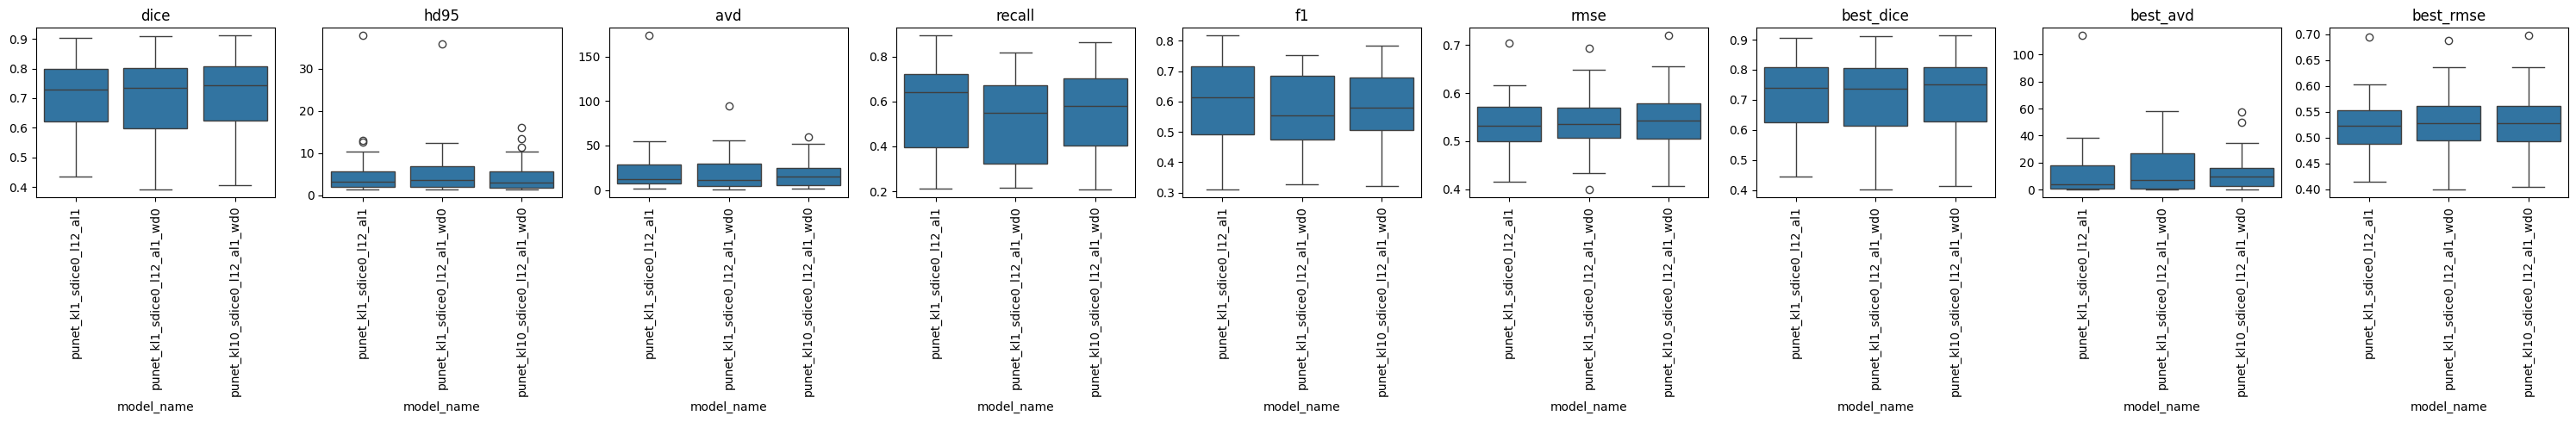

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,punet_kl1_sdice0_l12_al1,0.705,0.713,21.898,12.757,5.337,0.539,0.526,0.574,0.593
1,punet_kl1_sdice0_l12_al1_wd0,0.705,0.712,20.063,15.179,5.400,0.538,0.530,0.517,0.568
2,punet_kl10_sdice0_l12_al1_wd0,0.714,0.718,17.390,12.827,4.510,0.542,0.527,0.553,0.578


In [139]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, punet_wd, "punet_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

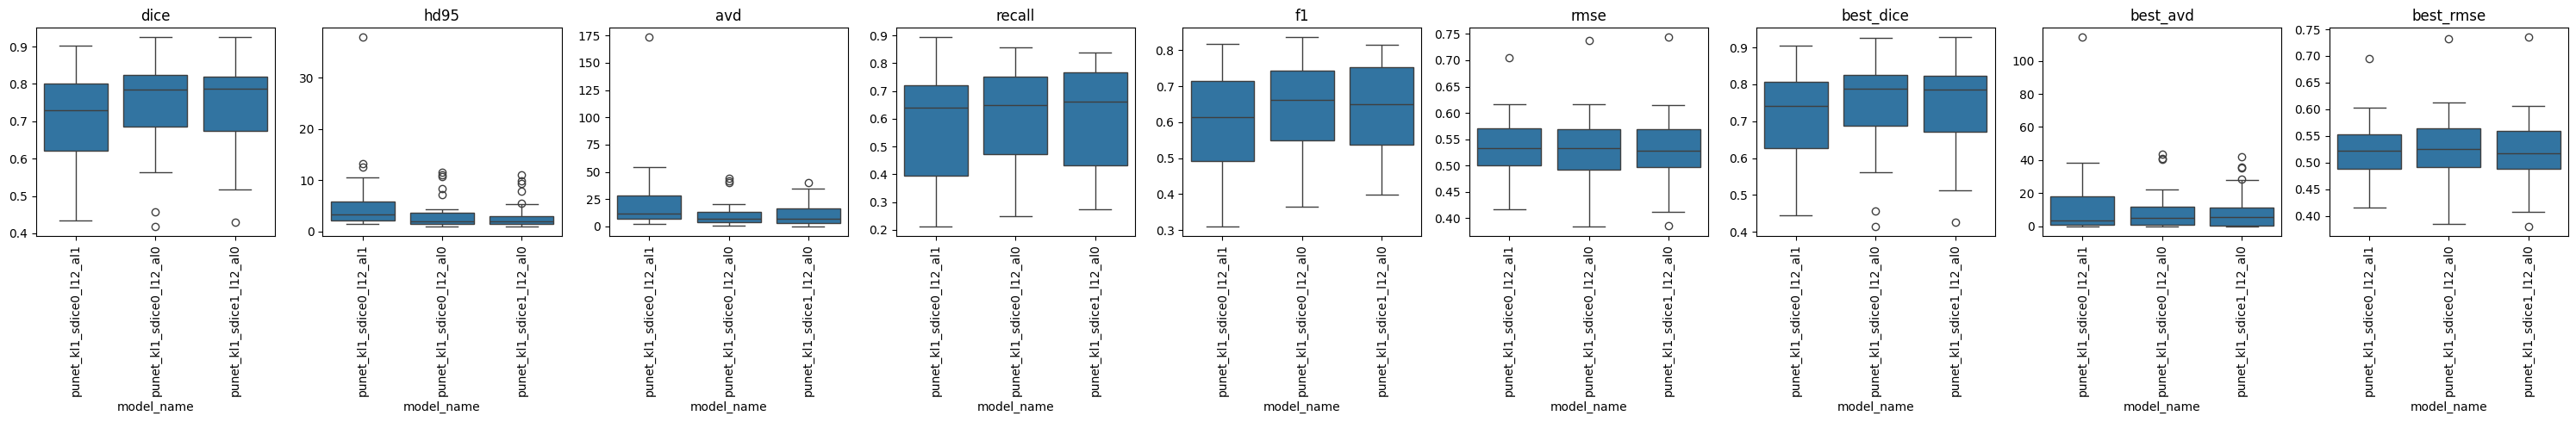

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,punet_kl1_sdice0_l12_al1,0.705,0.713,21.898,12.757,5.337,0.539,0.526,0.574,0.593
1,punet_kl1_sdice0_l12_al0,0.754,0.755,11.118,8.979,3.227,0.531,0.525,0.604,0.637
2,punet_kl1_sdice1_l12_al0,0.754,0.754,11.464,8.807,3.063,0.531,0.522,0.605,0.636


In [140]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, punet_al, "punet_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

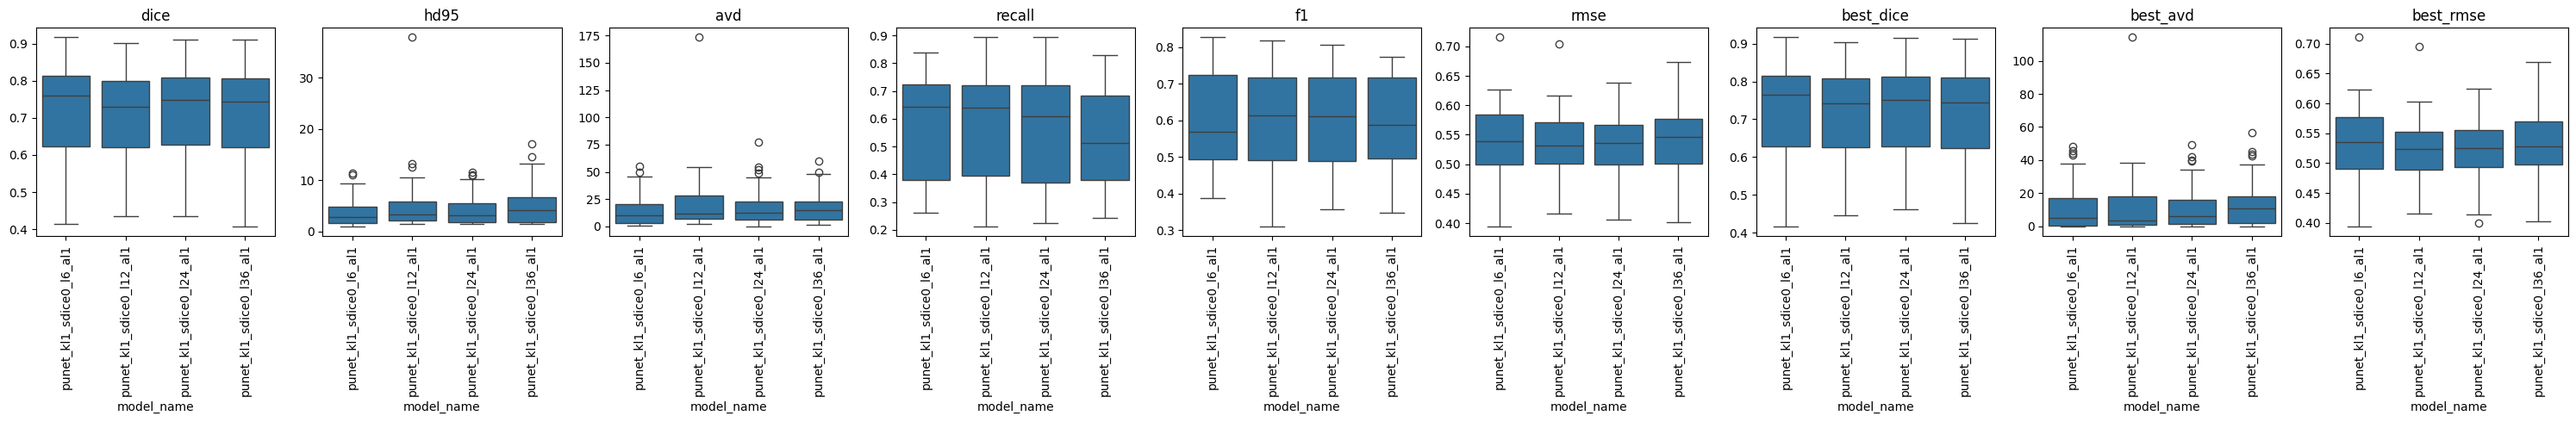

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,punet_kl1_sdice0_l6_al1,0.723,0.727,15.521,12.717,3.694,0.539,0.532,0.578,0.603
1,punet_kl1_sdice0_l12_al1,0.705,0.713,21.898,12.757,5.337,0.539,0.526,0.574,0.593
2,punet_kl1_sdice0_l24_al1,0.716,0.724,18.823,11.687,4.226,0.533,0.524,0.560,0.601
3,punet_kl1_sdice0_l36_al1,0.713,0.720,18.758,13.998,5.078,0.542,0.533,0.525,0.582


In [141]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, punet_ls, "punet_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

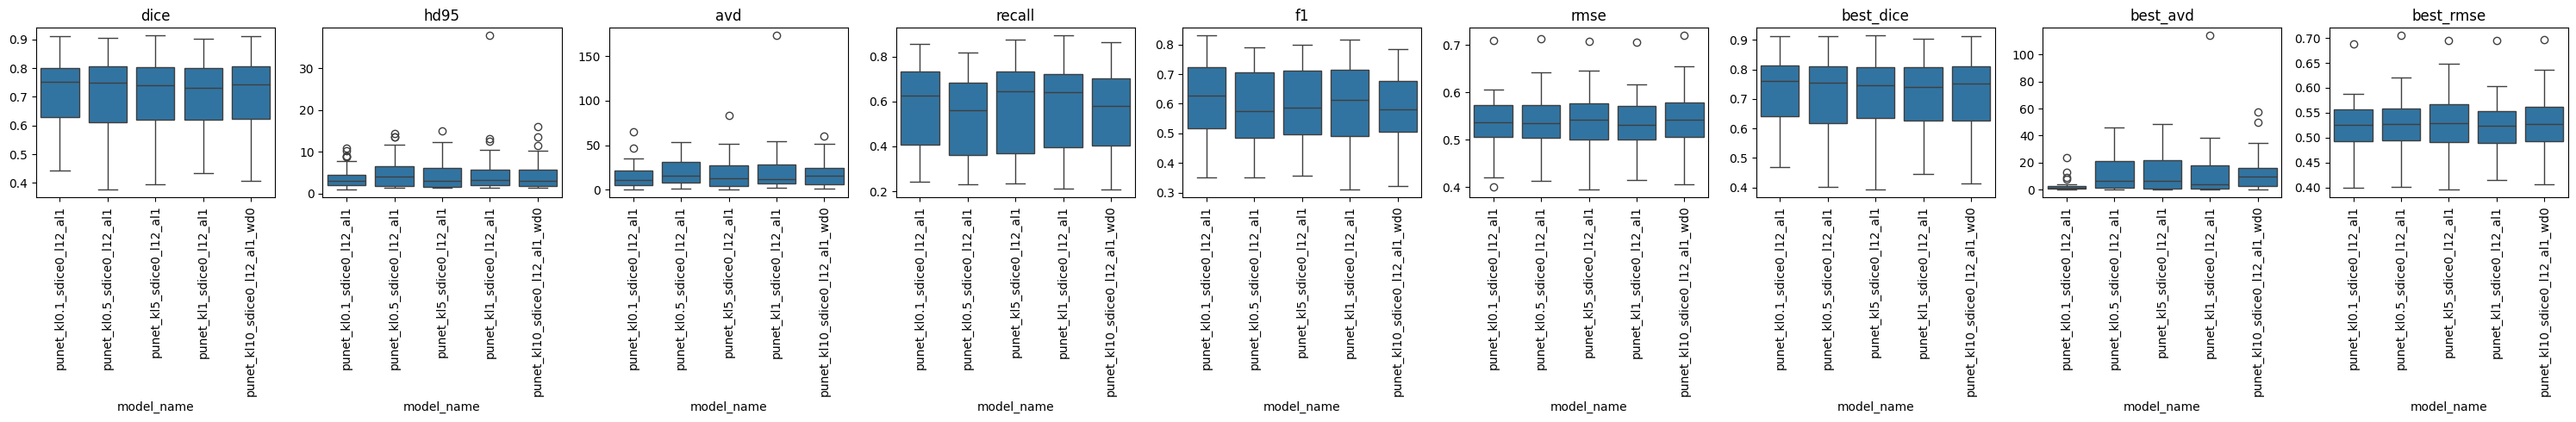

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,punet_kl0.1_sdice0_l12_al1,0.726,0.735,14.599,2.801,3.870,0.535,0.523,0.579,0.601
1,punet_kl0.5_sdice0_l12_al1,0.709,0.718,20.695,12.884,4.917,0.543,0.531,0.516,0.579
2,punet_kl5_sdice0_l12_al1,0.710,0.716,19.048,13.813,4.653,0.541,0.529,0.570,0.596
3,punet_kl1_sdice0_l12_al1,0.705,0.713,21.898,12.757,5.337,0.539,0.526,0.574,0.593
4,punet_kl10_sdice0_l12_al1_wd0,0.714,0.718,17.390,12.827,4.510,0.542,0.527,0.553,0.578


In [142]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, punet_kl, "punet_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

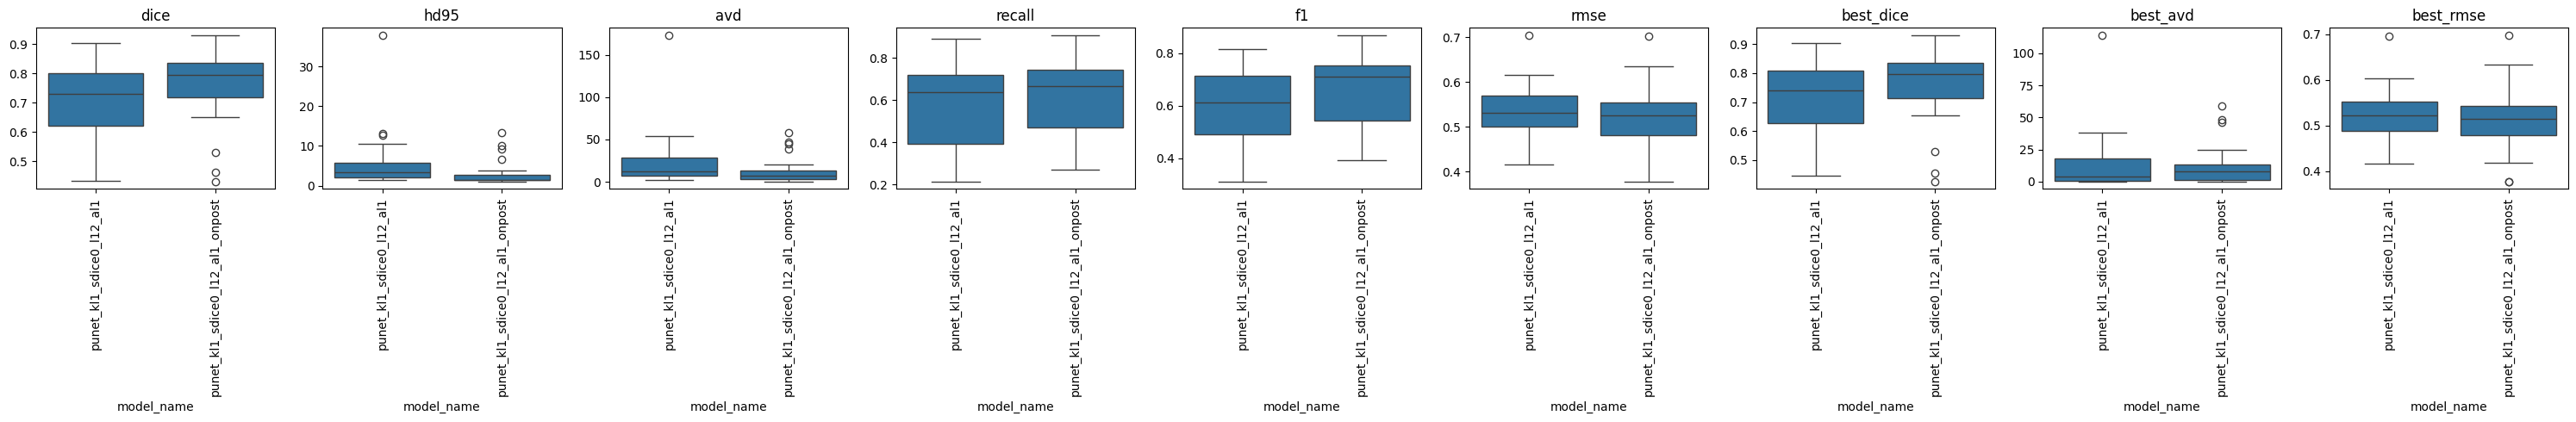

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,punet_kl1_sdice0_l12_al1,0.705,0.713,21.898,12.757,5.337,0.539,0.526,0.574,0.593
1,punet_kl1_sdice0_l12_al1_onpost,0.770,0.770,11.438,11.377,2.734,0.522,0.516,0.615,0.660


In [143]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, punet_onpost, "punet_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

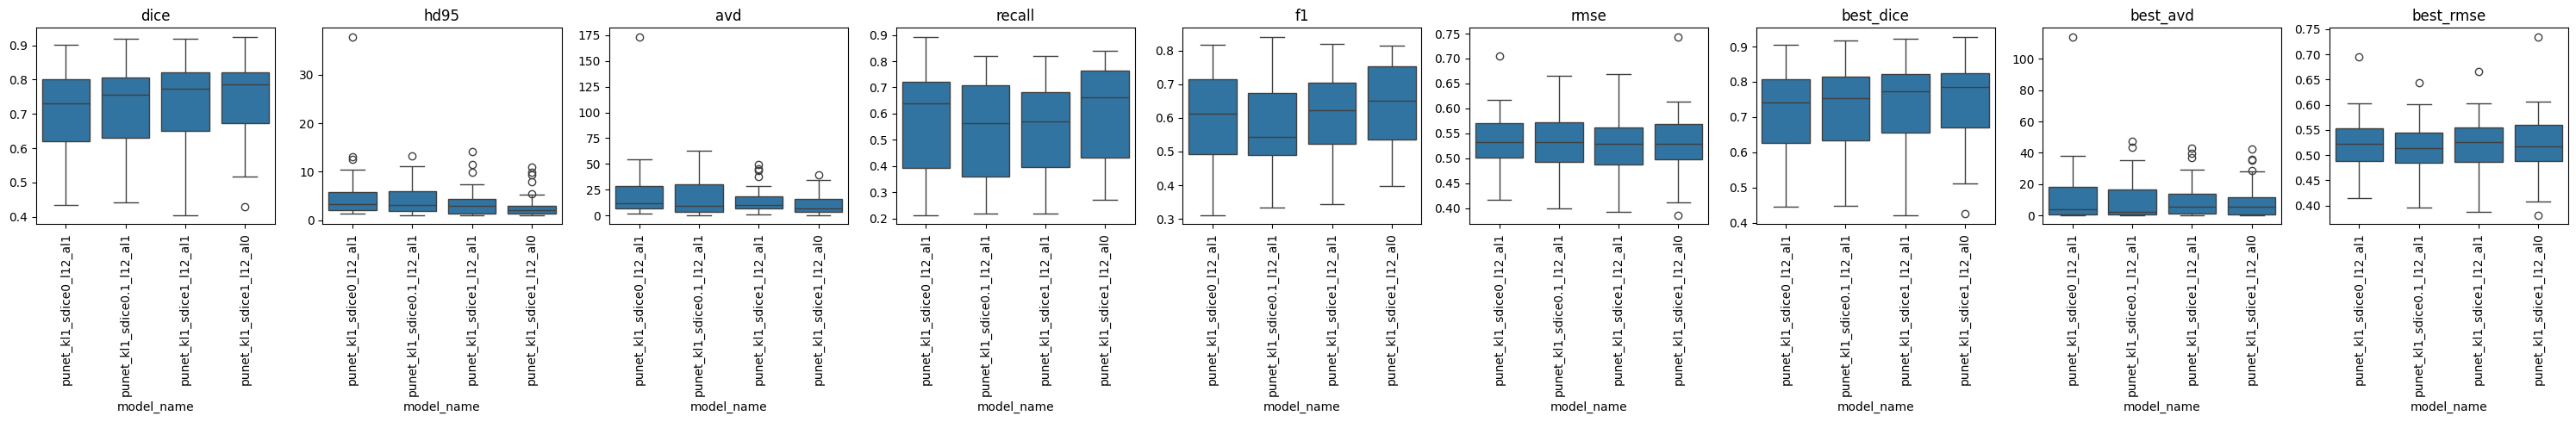

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,punet_kl1_sdice0_l12_al1,0.705,0.713,21.898,12.757,5.337,0.539,0.526,0.574,0.593
1,punet_kl1_sdice0.1_l12_al1,0.718,0.727,17.621,10.068,4.278,0.531,0.517,0.540,0.574
2,punet_kl1_sdice1_l12_al1,0.739,0.744,14.867,9.995,3.752,0.527,0.520,0.546,0.613
3,punet_kl1_sdice1_l12_al0,0.754,0.754,11.464,8.807,3.063,0.531,0.522,0.605,0.636


In [158]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, punet_sdice, "punet_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]

In [144]:
evid_kl_anneal = [
 'evid_combo_k0.1_anneal_short',
 'evid_combo_kl0.1',
 'evid_combo_k0.1_anneal_long',

]

evid_loss = [
 'evid_dice',
 'evid_mle',
 'evid_combo_kl0',
 'evid_xent',
]


evid_klmlecombo = [
 'evid_mlecombo_kl0.05',
 'evid_mlecombo_kl0.1',
 'evid_mlecombo_kl0.5',
]

evid_klxentcombo = [
 'evid_combo_kl0',
 'evid_combo_kl0.01',
 'evid_combo_kl0.05',
 'evid_combo_kl0.1',
 'evid_combo_kl0.5',
 'evid_combo_kl1',
]

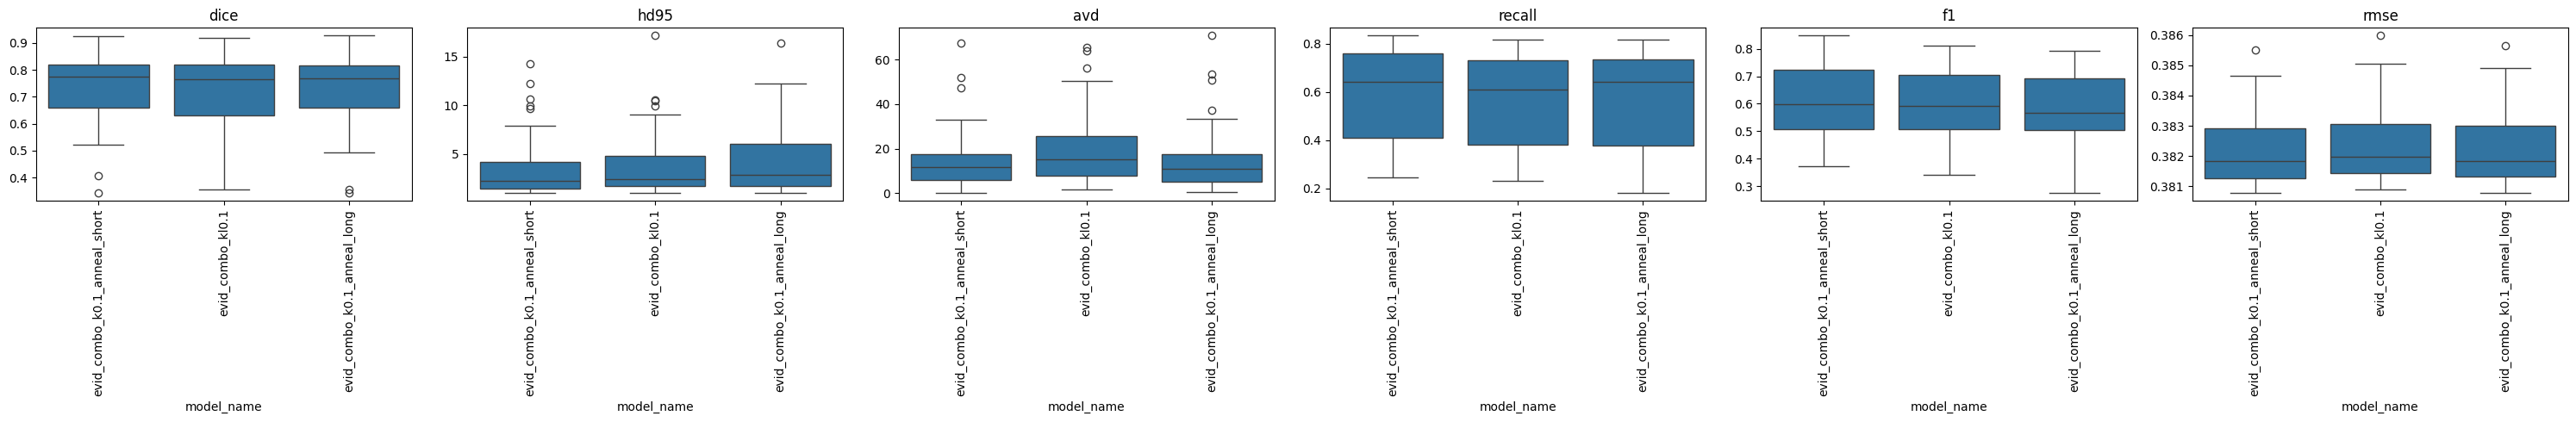

,model_name,dice_mean,avd_mean,hd95_mean,rmse_mean,recall_mean,f1_mean
0,evid_combo_k0.1_anneal_short,0.744,15.883,3.834,0.382,0.584,0.611
1,evid_combo_kl0.1,0.718,21.065,4.043,0.382,0.557,0.600
2,evid_combo_k0.1_anneal_long,0.732,15.153,4.465,0.382,0.573,0.580


In [146]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, evid_kl_anneal, "evid_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'avd_mean', 'hd95_mean', 'rmse_mean', 'recall_mean', 'f1_mean']]

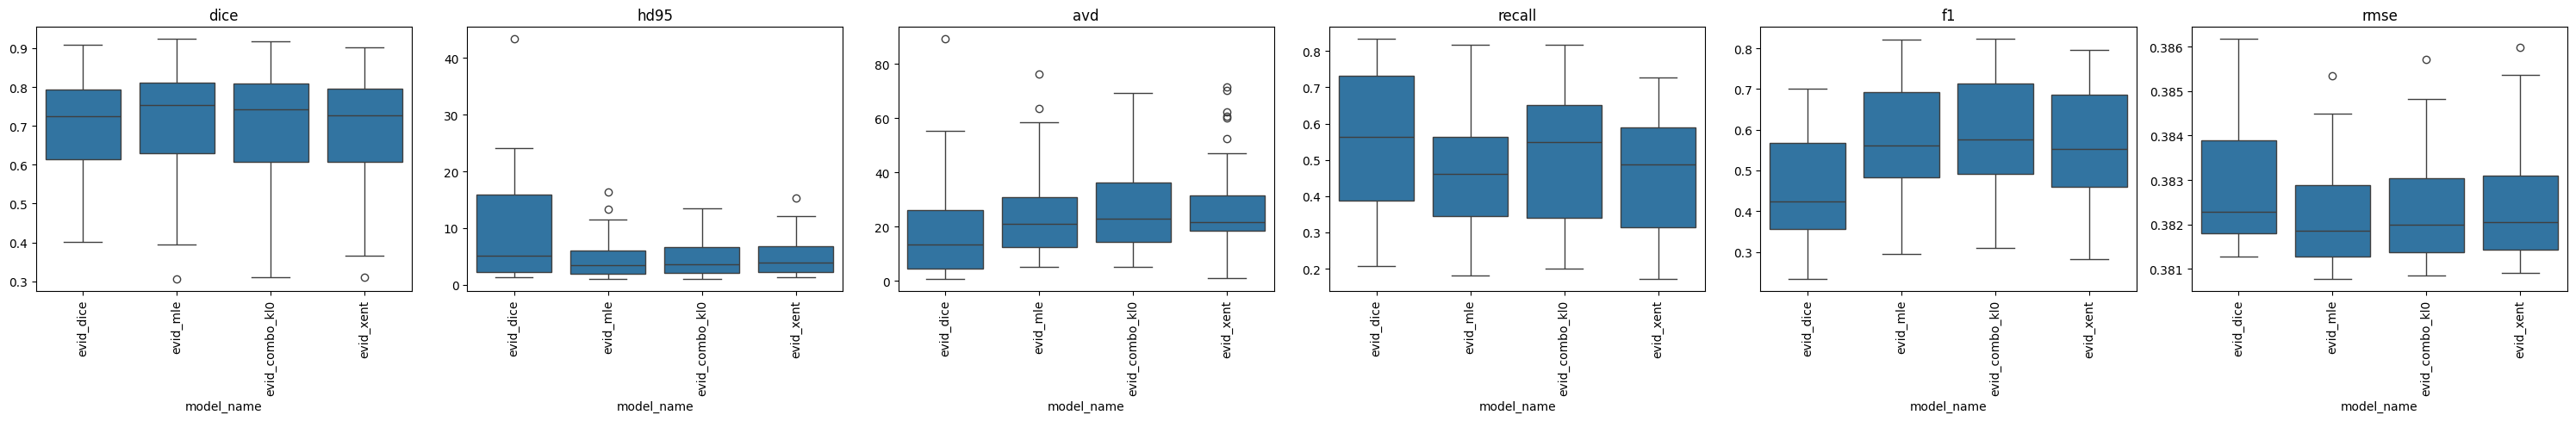

,model_name,dice_mean,avd_mean,hd95_mean,rmse_mean,recall_mean,f1_mean
0,evid_dice,0.703,18.318,9.515,0.383,0.559,0.453
1,evid_mle,0.719,25.839,4.646,0.382,0.462,0.575
2,evid_combo_kl0,0.699,27.090,4.645,0.382,0.504,0.577
3,evid_xent,0.691,28.643,5.229,0.382,0.447,0.552


In [147]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, evid_loss, "evid_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'avd_mean', 'hd95_mean', 'rmse_mean', 'recall_mean', 'f1_mean']]

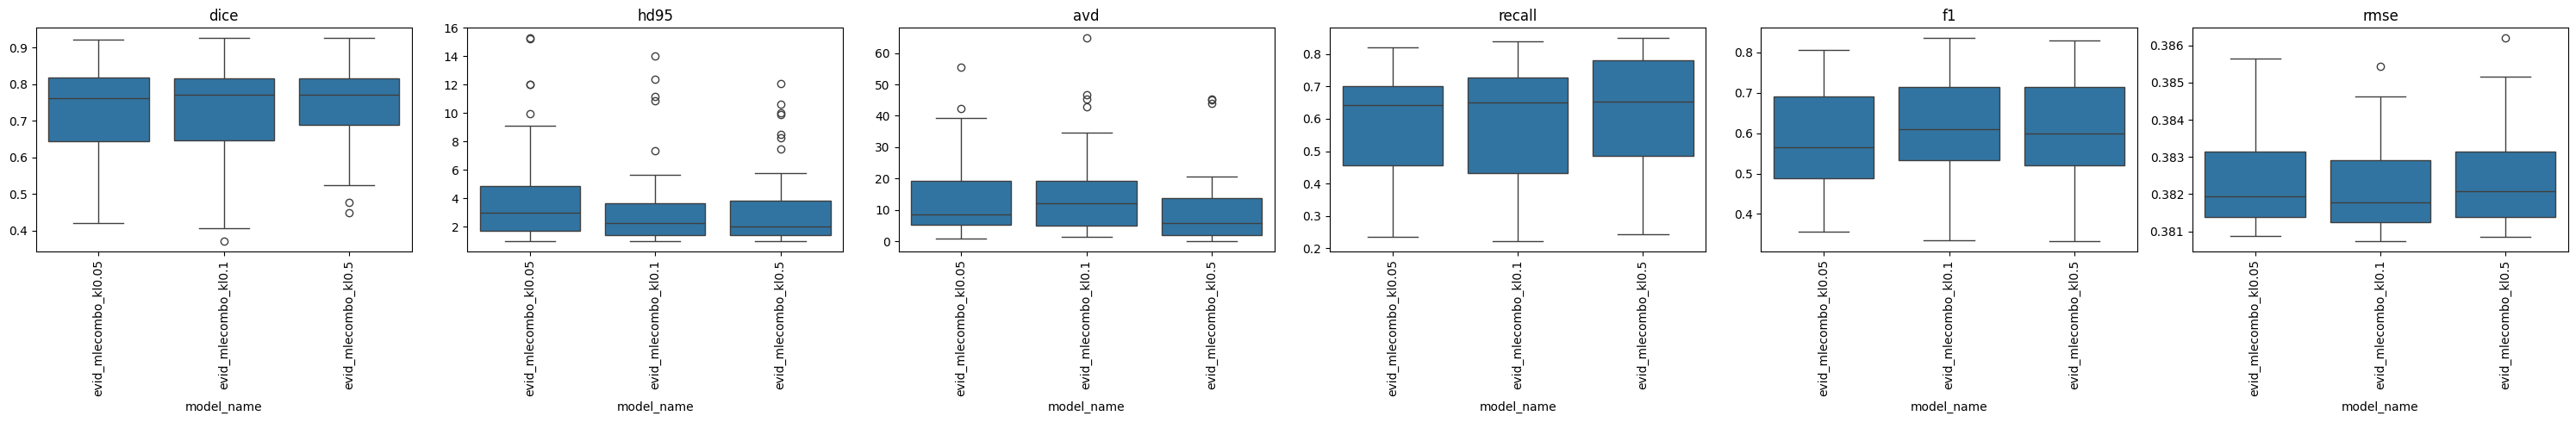

,model_name,dice_mean,avd_mean,hd95_mean,rmse_mean,recall_mean,f1_mean
0,evid_mlecombo_kl0.05,0.731,14.857,4.442,0.382,0.578,0.586
1,evid_mlecombo_kl0.1,0.739,16.163,3.476,0.382,0.585,0.610
2,evid_mlecombo_kl0.5,0.748,10.267,3.511,0.382,0.617,0.606


In [148]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, evid_klmlecombo, "evid_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'avd_mean', 'hd95_mean', 'rmse_mean', 'recall_mean', 'f1_mean']]

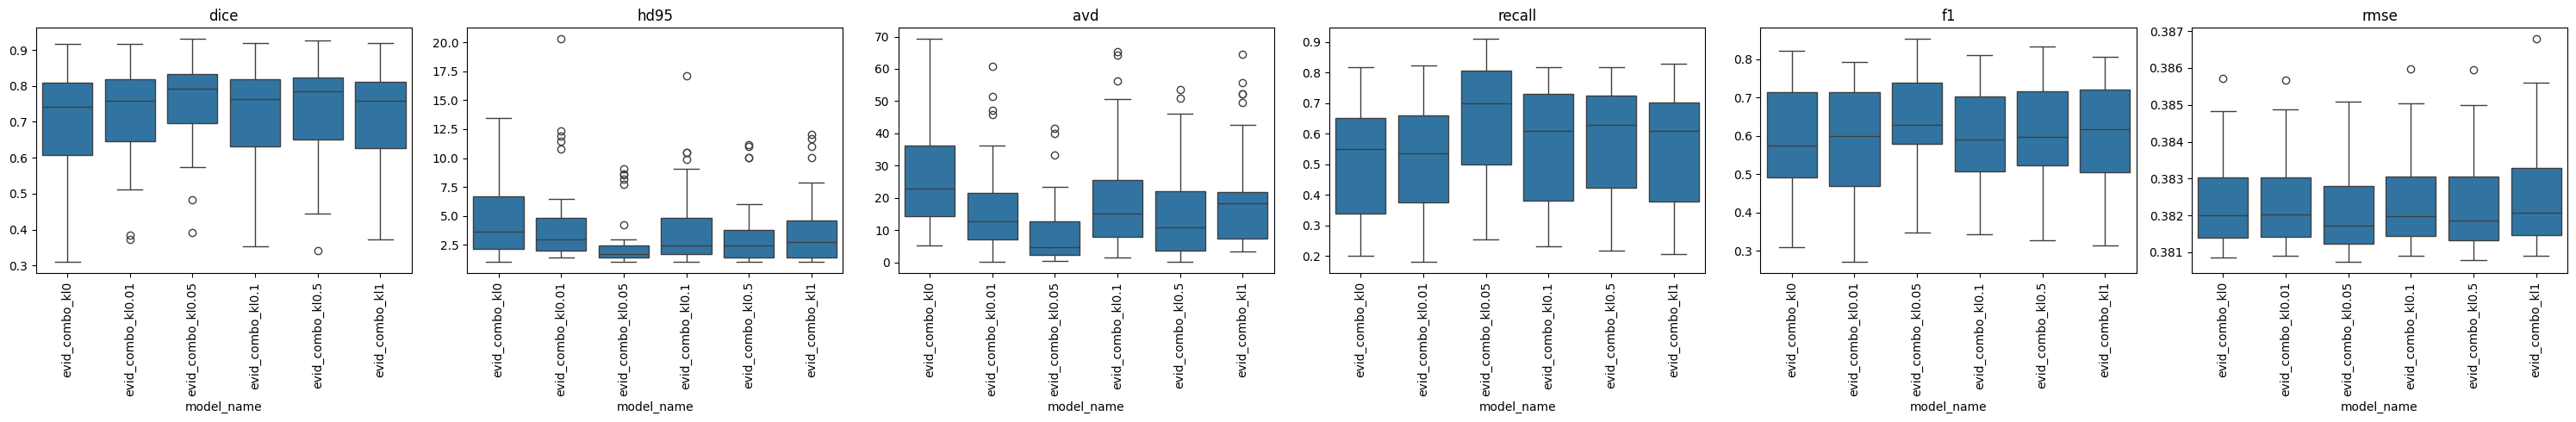

,model_name,dice_mean,avd_mean,hd95_mean,rmse_mean,recall_mean,f1_mean
0,evid_combo_kl0,0.699,27.090,4.645,0.382,0.504,0.577
1,evid_combo_kl0.01,0.725,17.166,4.531,0.382,0.519,0.574
2,evid_combo_kl0.05,0.768,9.360,2.693,0.382,0.641,0.629
3,evid_combo_kl0.1,0.718,21.065,4.043,0.382,0.557,0.600
4,evid_combo_kl0.5,0.740,15.605,3.494,0.382,0.567,0.603
5,evid_combo_kl1,0.721,20.728,3.855,0.383,0.546,0.601


In [149]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, evid_klxentcombo, "evid_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'avd_mean', 'hd95_mean', 'rmse_mean', 'recall_mean', 'f1_mean']]

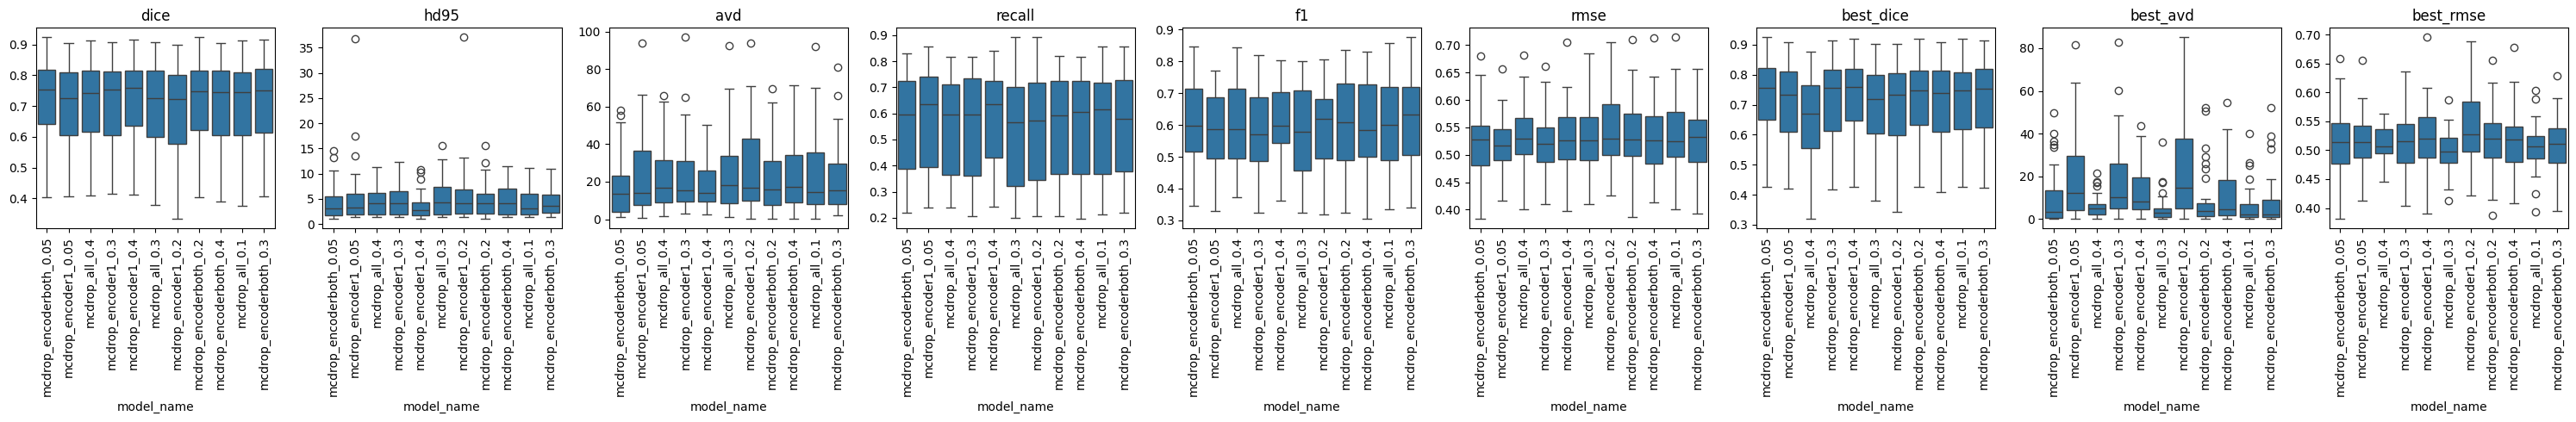

,model_name,dice_mean,best_dice_mean,avd_mean,best_avd_mean,hd95_mean,rmse_mean,best_rmse_mean,recall_mean,f1_mean
0,mcdrop_encoderboth_0.05,0.728,0.736,17.733,10.401,4.392,0.524,0.516,0.558,0.605
1,mcdrop_encoder1_0.05,0.700,0.705,22.391,18.759,5.505,0.519,0.515,0.578,0.582
2,mcdrop_all_0.4,0.713,0.649,22.360,6.007,4.565,0.535,0.511,0.559,0.598
3,mcdrop_encoder1_0.3,0.708,0.715,23.578,18.142,4.676,0.522,0.515,0.548,0.583
4,mcdrop_encoder1_0.4,0.731,0.737,19.492,13.311,3.528,0.529,0.522,0.579,0.610
5,mcdrop_all_0.3,0.704,0.692,24.568,5.138,5.199,0.531,0.499,0.520,0.583
6,mcdrop_encoder1_0.2,0.691,0.697,26.817,23.234,5.730,0.541,0.536,0.535,0.589
7,mcdrop_encoderboth_0.2,0.717,0.724,21.646,9.082,4.801,0.534,0.518,0.549,0.602
8,mcdrop_encoderboth_0.4,0.706,0.713,23.320,12.061,4.734,0.532,0.514,0.549,0.599
9,mcdrop_all_0.1,0.706,0.717,23.771,6.217,4.490,0.536,0.503,0.563,0.602


In [155]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, [m for m in model_names if "mc" in m], "mcdrop_tune")
plot_box_colums(ind_dfs)
overall_dfs[['model_name', 'dice_mean', 'best_dice_mean', 'avd_mean', 'best_avd_mean', 'hd95_mean', 'rmse_mean', 'best_rmse_mean', 'recall_mean', 'f1_mean']]